In [8]:
import pandas as pd
import numpy as np
import xlrd
!pip install openpyxl
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 243 kB 19.8 MB/s 
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=10ea9b99a56080c0811584e729e35409e021c79b74c6434ca8da9093a8482eec
  Stored in directory: /root/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [9]:
impactDf = pd.read_excel("all_impact_metrics.xlsx")
impactDf.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
len(impactDf.columns) ## there are 35 columns

35

In [11]:
impactDf.columns

Index(['Player', 'Season', 'Team', 'Offensive Archetype', 'Minutes', 'Games',
       'Age', 'O-LEBRON', 'D-LEBRON', 'Wins Added', 'MPG', 'ORPM', 'DRPM',
       'poss', 'raptor_offense', 'raptor_defense', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'pace_impact', 'LA_RAPM__Def', 'LA_RAPM__Off',
       'RA_EFG__Def', 'RA_EFG__Off', 'RA_FTR__Def', 'RA_FTR__Off',
       'RA_ORBD__Def', 'RA_ORBD__Off', 'RA_TOV__Def', 'RA_TOV__Off',
       'RAPM__Def', 'RAPM__Off', 'clean_season'],
      dtype='object')

In [12]:
offensive = ['O-LEBRON', 'ORPM', 'raptor_offense', 'LA_RAPM__Off', 'RA_EFG__Off', 'RAPM__Off']
defensive = ['D-LEBRON', 'DRPM', 'raptor_defense', 'LA_RAPM__Def', 'RA_EFG__Def', 'RAPM__Def']
other = [feature for feature in impactDf.columns.values  if not (feature in offensive or feature in defensive)]

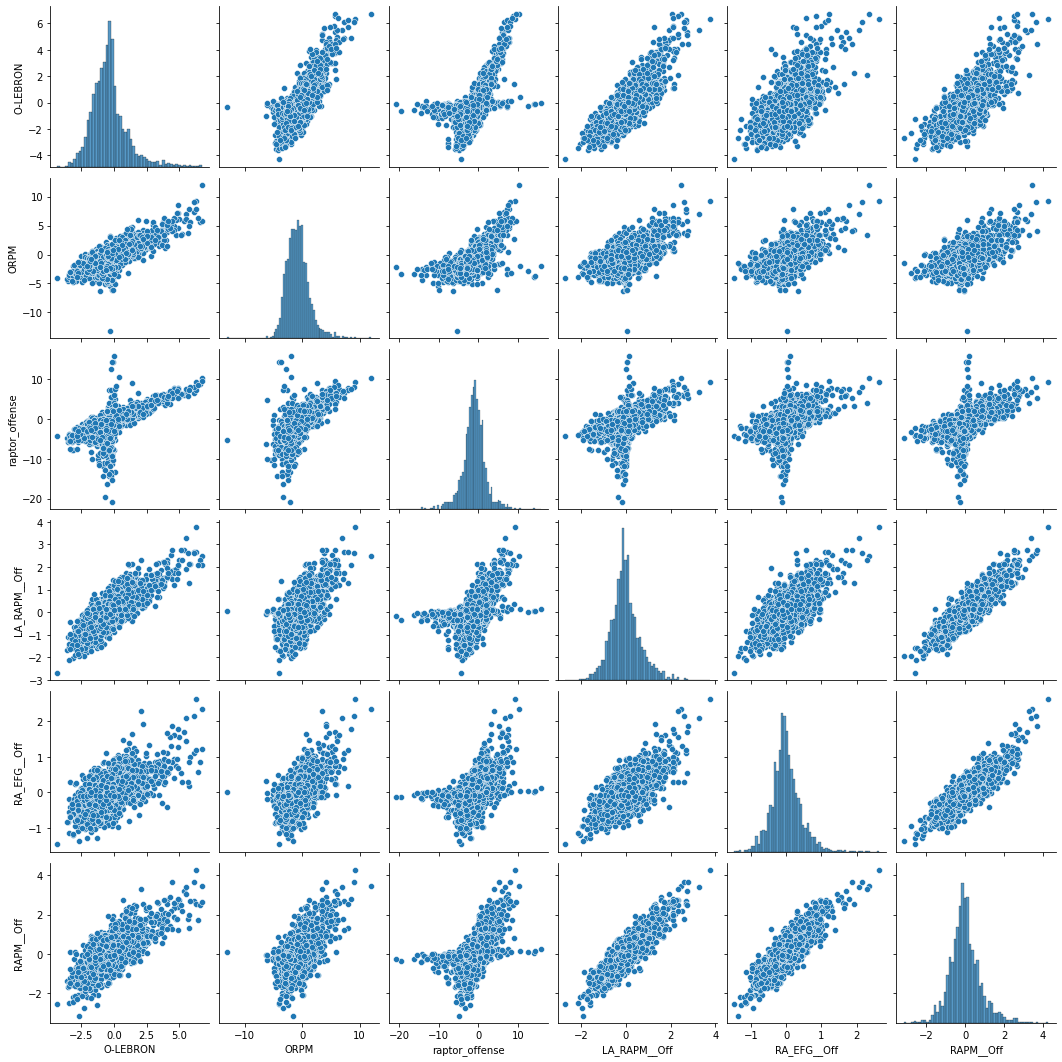

In [24]:
offDf = impactDf[offensive]
sns.pairplot(data=offDf)

noticed a lot of these offensive metric correlate strongly to each other, which means they offer redundant information.
also, they all seem to have a normal distribution.

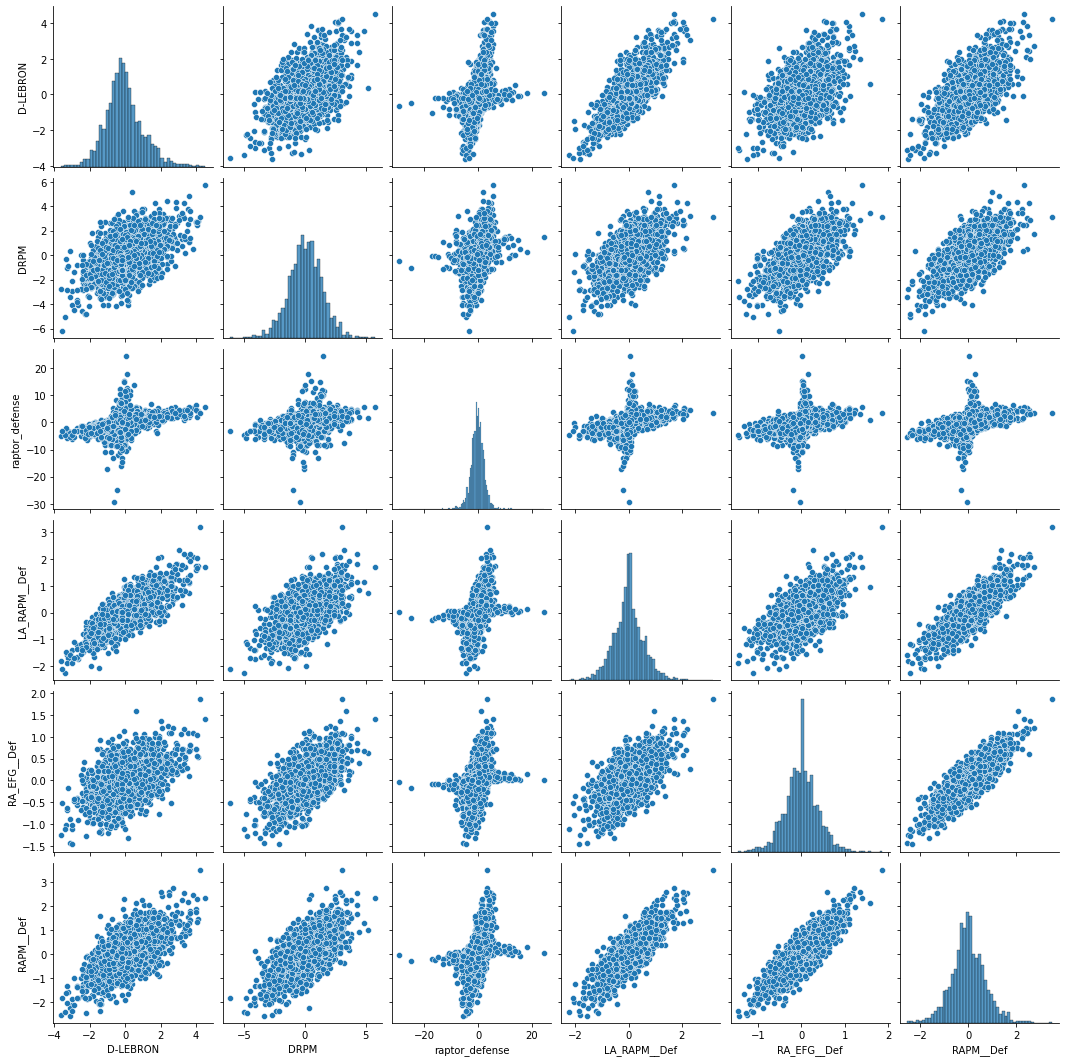

In [13]:
defDf = impactDf[defensive]
sns.pairplot(data=defDf)

Defense correlations are also positive, but not as strong compared to offensive stats. 

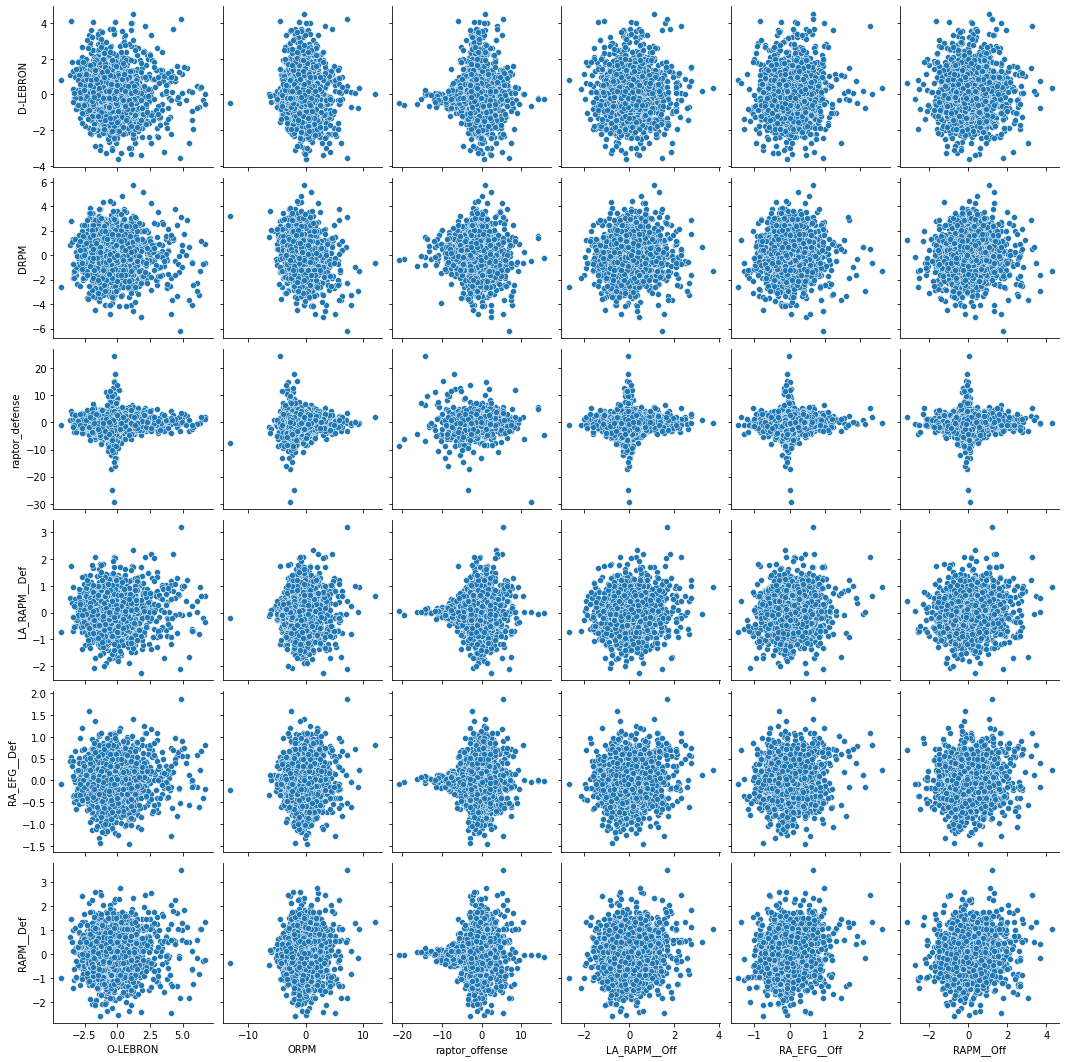

In [14]:
sns.pairplot(impactDf, x_vars=offensive, y_vars=defensive)


looking at low-variance features to remove because low-variance features don't offer information

In [40]:
from sklearn.feature_selection import VarianceThreshold
numericalDf = pd.concat([offDf, defDf], axis=1)

var_thresh = VarianceThreshold(threshold=0.1)
transformed_data = var_thresh.fit_transform(numericalDf)
transformed_data.shape

none of the features had low-variance, so we kept them all in the dataset.

stuff to do:
1. box-plots
2. heatmaps
3. 

heatmaps for offensive and defensive impact metrics to see correlations between features

<AxesSubplot:>

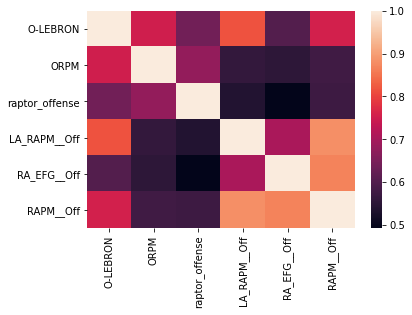

In [46]:
sns.heatmap(offDf.corr())

<AxesSubplot:>

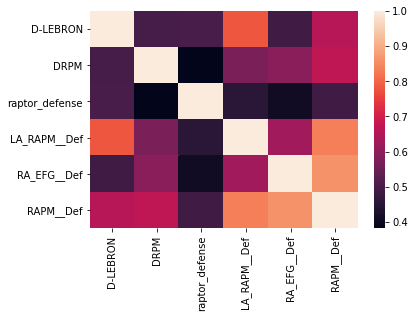

In [47]:
sns.heatmap(defDf.corr())

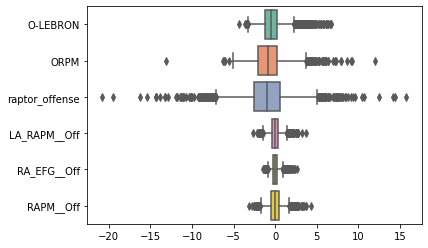

In [87]:
offbox = sns.boxplot(data=offDf, orient="h", palette="Set2")

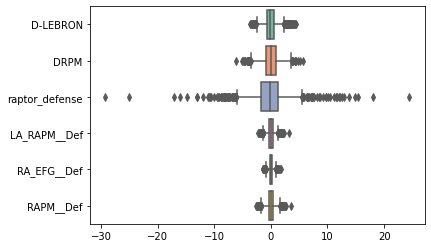

In [85]:
defbox = sns.boxplot(data=defDf, orient="h", palette="Set2")

In [65]:
impactDf.describe()

,Minutes,Games,Age,O-LEBRON,D-LEBRON,Wins Added,MPG,ORPM,DRPM,poss,...,RA_EFG__Off,RA_FTR__Def,RA_FTR__Off,RA_ORBD__Def,RA_ORBD__Off,RA_TOV__Def,RA_TOV__Off,RAPM__Def,RAPM__Off,clean_season
count,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,...,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000
mean,1158.096289,50.731436,26.127063,-0.341177,-0.046684,1.865050,20.037376,-0.748606,0.052834,2567.586221,...,0.002756,0.004163,0.001906,0.002599,0.001262,-0.002096,-0.000309,0.003927,0.003399,2018.053218
std,817.979476,24.647864,4.259188,1.384843,1.083952,2.731071,8.944263,1.953134,1.385466,1853.178522,...,0.414277,0.449915,0.470334,0.521560,0.648864,0.333163,0.311027,0.713057,0.804490,1.408092
min,10.566667,1.000000,19.000000,-4.322019,-3.637443,-3.532983,2.300000,-13.150000,-6.170000,23.000000,...,-1.470000,-1.530000,-1.920000,-2.010000,-2.100000,-1.510000,-1.530000,-2.550000,-3.150000,2016.000000
25%,387.518333,30.750000,23.000000,-1.204808,-0.706126,0.120058,13.000000,-2.040000,-0.830000,846.750000,...,-0.240000,-0.260000,-0.280000,-0.310000,-0.380000,-0.200000,-0.190000,-0.410000,-0.470000,2017.000000
50%,1129.116667,58.000000,25.000000,-0.468873,-0.148283,0.734777,19.700000,-0.880000,0.075000,2458.000000,...,-0.030000,0.010000,0.010000,0.020000,-0.020000,0.010000,0.010000,-0.020000,-0.060000,2018.000000
75%,1824.401667,72.000000,29.000000,0.180744,0.512744,2.598703,27.500000,0.270000,0.970000,4021.250000,...,0.210000,0.250000,0.242500,0.310000,0.350000,0.190000,0.180000,0.430000,0.400000,2019.000000
max,3124.635000,82.000000,43.000000,6.743428,4.523461,15.937830,42.000000,12.030000,5.740000,8026.000000,...,2.640000,1.910000,2.280000,2.080000,3.220000,1.170000,1.240000,3.490000,4.280000,2020.000000


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b68f3b00-c35b-4bac-a12a-e3809890e0e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>